In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt


loan_approval = pd.read_csv("/kaggle/input/loanapp/LoanApprovalPrediction.csv")
loan_approval

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# **visualizations** 

In [2]:
print("samples number:" , len(loan_approval))
print("features number:", len(loan_approval.columns))

samples number: 614
features number: 13


In [3]:
loan_approval.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
loan_approval.count(axis=0, numeric_only=False)

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

In [5]:
loan_approval.dtypes 

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
loan_approval.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
corr_matrix = loan_approval.corr(numeric_only=True)
corr_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [8]:
numercal = ['Loan_Amount_Term','LoanAmount','ApplicantIncome','CoapplicantIncome']
categorical = ['Gender','Married','Dependents','Self_Employed','Credit_History','Education']

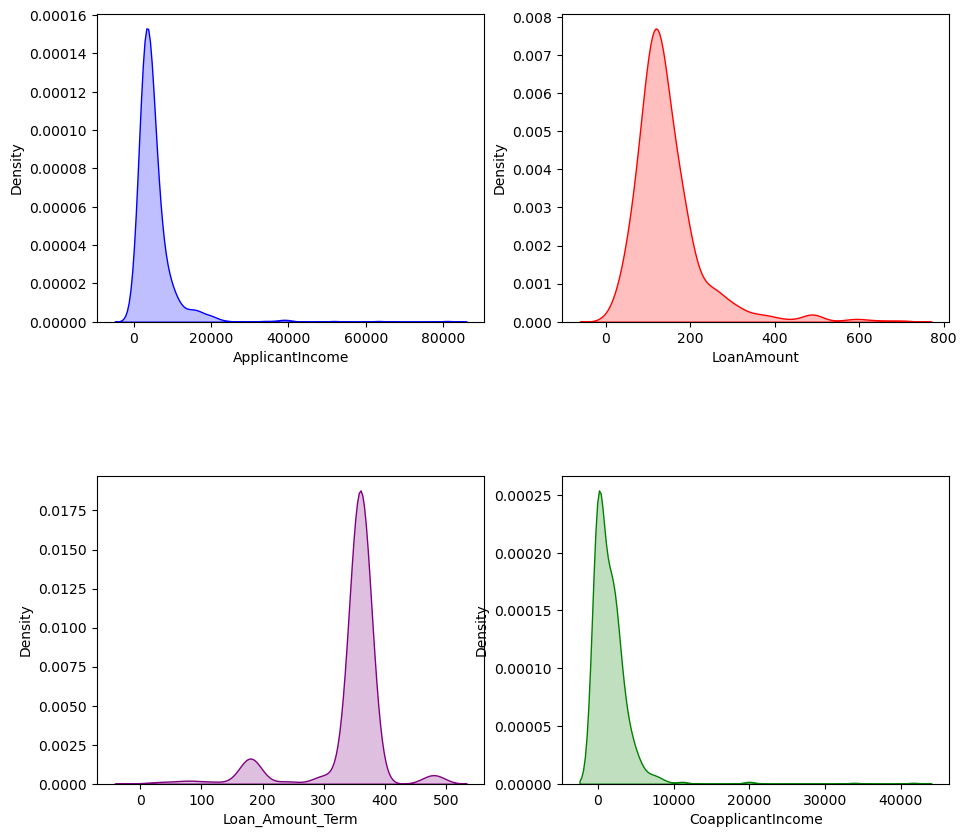

In [9]:
fig,ax = plt.subplots(2,2,figsize=(11,10))

sns.kdeplot(loan_approval['ApplicantIncome'],color=('blue'), ax=ax[0][0], fill=True)
sns.kdeplot(loan_approval['LoanAmount'],color=('red'), ax=ax[0][1], fill=True)
sns.kdeplot(loan_approval['Loan_Amount_Term'],color=('purple'), ax=ax[1][0], fill=True)
sns.kdeplot(loan_approval['CoapplicantIncome'],color=('green'), ax=ax[1][1],fill=True)
plt.subplots_adjust(hspace=0.5)

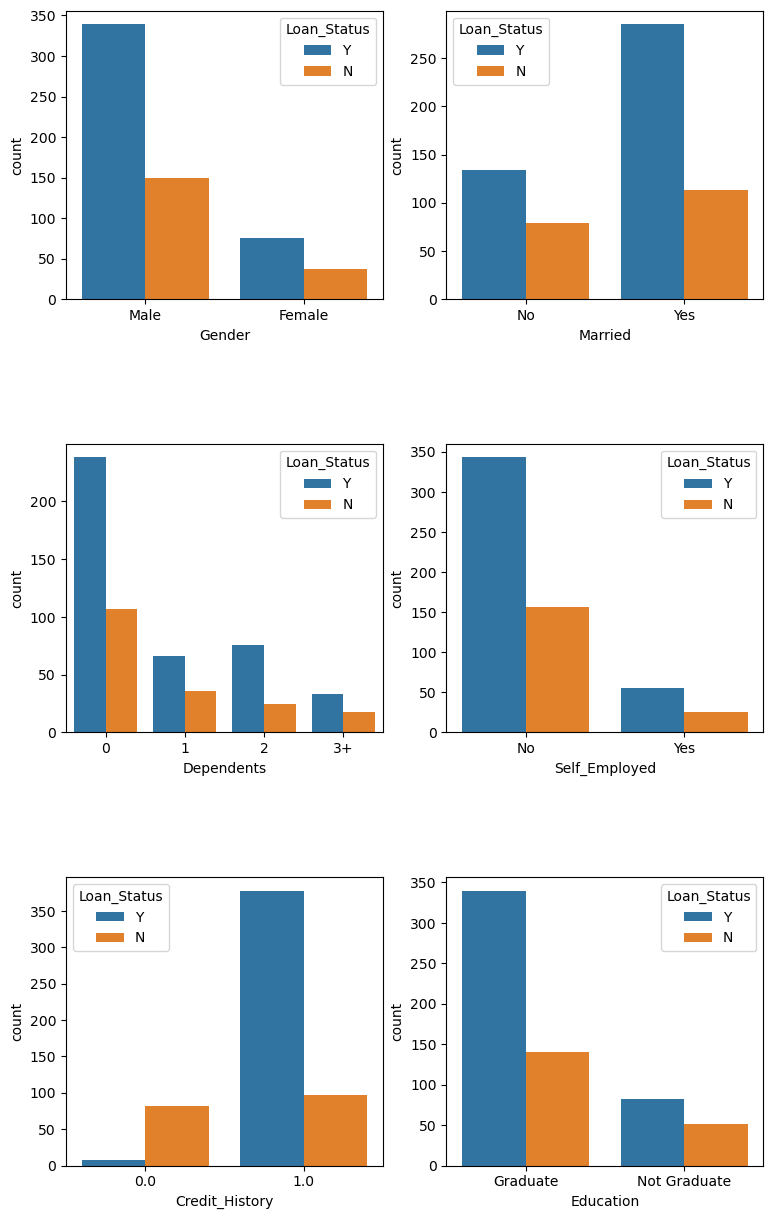

In [10]:
fig,axes = plt.subplots(3,2,figsize=(9,15))
for idx,cat_col in enumerate(categorical):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=loan_approval,hue='Loan_Status',ax=axes[row,col])
plt.subplots_adjust(hspace=0.5)



**The plots showed that:**
1. Most of the population in the dataset are males and they are more likely accepted for loans
2. Married applicants are more likely to be granted loans.
3. Zero depandents applicants are more likely to be granted loans.
4. Most of the population are not self-empolyed
5. Applicants who have credit hestore are more acceptable
6. Graduates have higher propotion of loan approval


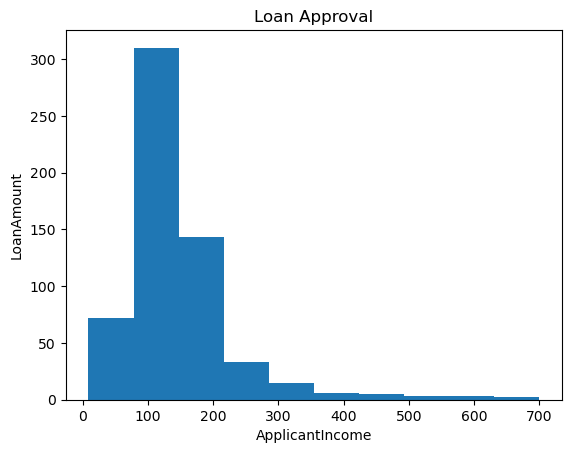

In [11]:
plt.hist(loan_approval['LoanAmount'], bins=10)
plt.title("Loan Approval")
plt.xlabel("ApplicantIncome")
plt.ylabel("LoanAmount")
plt.show()

Number of people who take a loan group by gender :
Yes    398
No     213
Name: Married, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

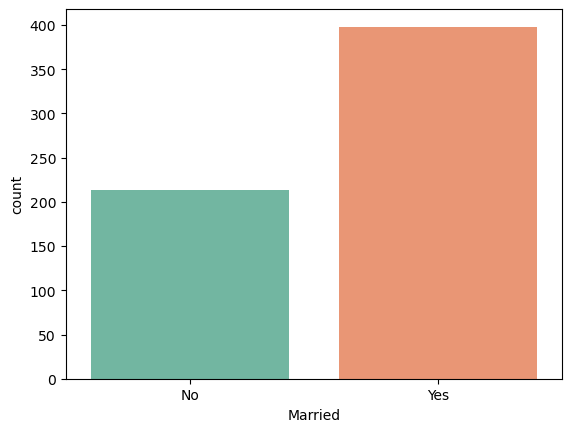

In [12]:
print("Number of people who take a loan group by gender :")
print(loan_approval['Married'].value_counts())
sns.countplot(x='Married', data=loan_approval, palette = 'Set2')

Number of people who take a loan group by dependents :
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

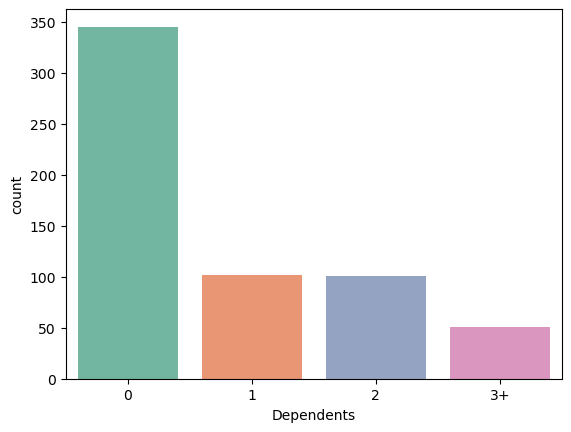

In [13]:
print("Number of people who take a loan group by dependents :")
print(loan_approval['Dependents'].value_counts())
sns.countplot(x='Dependents', data=loan_approval, palette = 'Set2')

Number of people who take a loan group by loan amount term :


<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

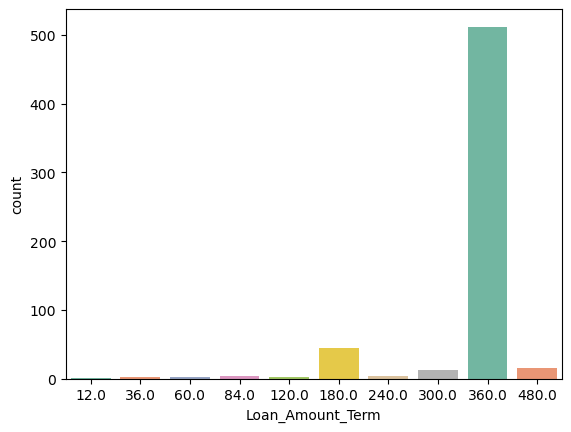

In [14]:
print("Number of people who take a loan group by loan amount term :")
sns.countplot(x='Loan_Amount_Term', data=loan_approval, palette = 'Set2')

<Axes: ylabel='Loan_Status'>

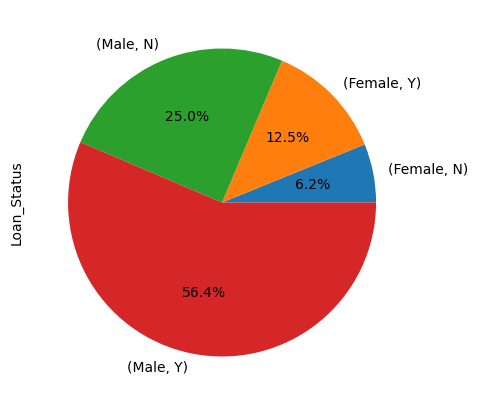

In [15]:
loan_approval.groupby('Gender')['Loan_Status'].value_counts().sort_values().plot(kind='pie',figsize=(5,5),autopct='%1.1f%%')

# **imputing missing values to (most frequent)**

In [17]:
from sklearn.impute import SimpleImputer, KNNImputer
imputer = KNNImputer()

for col in numercal:
  loan_approval[col] = imputer.fit_transform(loan_approval[[col]])

imputer = SimpleImputer(strategy = 'most_frequent')
for col in categorical:
    loan_approval[col] = imputer.fit_transform(loan_approval[[col]])

In [18]:
loan_approval.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
depend ={'0':0,
         '1':1,
         '2':2,
         '3+':3}

loan_approval['Dependents'] = loan_approval['Dependents'].map(depend)

In [20]:
loan_approval

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106.0,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.000000,360.0,1.0,Urban,Y


In [21]:
loan_approval= pd.get_dummies(loan_approval,columns=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status'],drop_first=True)
loan_approval

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,LP001002,0,5849.0,0.0,146.412162,360.0,1.0,1,0,0,0,0,1,1
1,LP001003,1,4583.0,1508.0,128.000000,360.0,1.0,1,1,0,0,0,0,0
2,LP001005,0,3000.0,0.0,66.000000,360.0,1.0,1,1,0,1,0,1,1
3,LP001006,0,2583.0,2358.0,120.000000,360.0,1.0,1,1,1,0,0,1,1
4,LP001008,0,6000.0,0.0,141.000000,360.0,1.0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,2900.0,0.0,71.000000,360.0,1.0,0,0,0,0,0,0,1
610,LP002979,3,4106.0,0.0,40.000000,180.0,1.0,1,1,0,0,0,0,1
611,LP002983,1,8072.0,240.0,253.000000,360.0,1.0,1,1,0,0,0,1,1
612,LP002984,2,7583.0,0.0,187.000000,360.0,1.0,1,1,0,0,0,1,1


# **Decision tree classifier**

In [22]:
x = loan_approval.drop(['Loan_Status_Y','Loan_ID'],axis=1)
y = loan_approval.loc[:, 'Loan_Status_Y']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= , random_state=100)

#max_depth=3,min_samples_leaf = 35
dtc = DecisionTreeClassifier(random_state=100)
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of DecisionTree: {accuracy:.3f}")

Accuracy of DecisionTree: 0.719


In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix , precision_score,recall_score,f1_score
print(f'Training Accuracy: {accuracy_score(y_train,dtc.predict(x_train))}') 
print(f'Testing Accuracy : {accuracy_score(y_test,y_pred):.4f}')
print(f'Testing confusion_matrix : \n{confusion_matrix(y_test,y_pred)}')
print(f'Testing Recall :{recall_score(y_test,y_pred) }')
print(f'Testing precision :{precision_score(y_test,y_pred):.4f}')
print(f'Testing F1 :{f1_score(y_test,y_pred)}')

Training Accuracy: 1.0
Testing Accuracy : 0.7192
Testing confusion_matrix : 
[[ 39  28]
 [ 29 107]]
Testing Recall :0.7867647058823529
Testing precision :0.7926
Testing F1 :0.7896678966789669


In [24]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 4, 6, 8, 10],
    'max_features': ['sqrt', 'log2', None],
    'splitter': ['best', 'random']
}

dtc1 = DecisionTreeClassifier(random_state=100)

gs_dtc = GridSearchCV(dtc1, param_grid, cv=5)
gs_dtc.fit(x_train, y_train)

# print the best hyperparameters
print(f"Best hyperparameters: {gs_dtc.best_params_}")

dtc_best = DecisionTreeClassifier(**gs_dtc.best_params_, random_state=100)
dtc_best.fit(x_train, y_train)
y_pred_best = dtc_best.predict(x_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy of DecisionTree Classifier with best hyperparameters: {accuracy_best:.4f}")
print(f'Testing Recall :{recall_score(y_test,y_pred_best):.4f}')
print(f'Testing precision :{precision_score(y_test,y_pred_best):.4f}')
print(f'Testing F1 :{f1_score(y_test,y_pred_best):.4f}')
print(f'Testing confusion_matrix : \n{confusion_matrix(y_test,y_pred)}')


Best hyperparameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'splitter': 'random'}
Accuracy of DecisionTree Classifier with best hyperparameters: 0.7833
Testing Recall :0.9706
Testing precision :0.7674
Testing F1 :0.8571
Testing confusion_matrix : 
[[ 39  28]
 [ 29 107]]


In [25]:
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(x_train,y_train)
pred_svc = model_svc.predict(x_test)
accuracy= accuracy_score(y_test,pred_svc)
print(f"Accuracy of svm: {accuracy:.3f}")

Accuracy of svm: 0.665


In [26]:
svc_model=SVC(kernel='linear',C=0.025,random_state=101)
svc_model.fit(x_train,y_train)

y_pred=svc_model.predict(x_test)

print(f'Testing Accuracy :  {accuracy_score(y_test,y_pred):.4f}')
print(f'Testing Recall :{recall_score(y_test,y_pred) }')
print(f'Testing precision :{precision_score(y_test,y_pred):.4f}')
print(f'Testing F1 :{f1_score(y_test,y_pred):.4f}')
print(f'Testing confusion_matrix : \n{confusion_matrix(y_test,y_pred)}')

Testing Accuracy :  0.7537
Testing Recall :0.9632352941176471
Testing precision :0.7443
Testing F1 :0.8397
Testing confusion_matrix : 
[[ 22  45]
 [  5 131]]


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
            ('std_scaler',StandardScaler()),
                    ])
scaled_X_train = pipeline.fit_transform(x_train)
scaled_X_test = pipeline.transform(x_test)

In [28]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = grid = GridSearchCV(model_svc,param_grid)
grid.fit(scaled_X_train,y_train)

grid_svc = grid.predict(scaled_X_test)
accuracy=accuracy_score(y_test,grid_svc)
print(f"Accuracy of svm: {accuracy:.3f}")
print(f'Testing Recall :{recall_score(y_test,y_pred) }')
print(f'Testing precision :{precision_score(y_test,y_pred):.4f}')
print(f'Testing F1 :{f1_score(y_test,y_pred):.4f}')
print(f'Testing confusion_matrix : \n{confusion_matrix(y_test,y_pred)}')

   

Accuracy of svm: 0.788
Testing Recall :0.9632352941176471
Testing precision :0.7443
Testing F1 :0.8397
Testing confusion_matrix : 
[[ 22  45]
 [  5 131]]


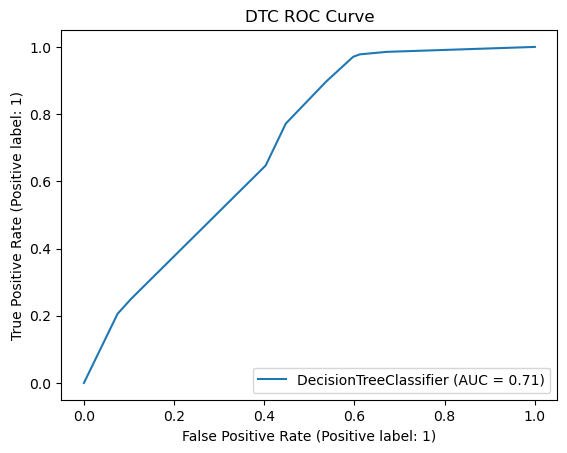

In [29]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(dtc_best, x_test, y_test)
plt.title("DTC ROC Curve")
plt.show()

In [32]:
import warnings
warnings.filterwarnings('ignore')

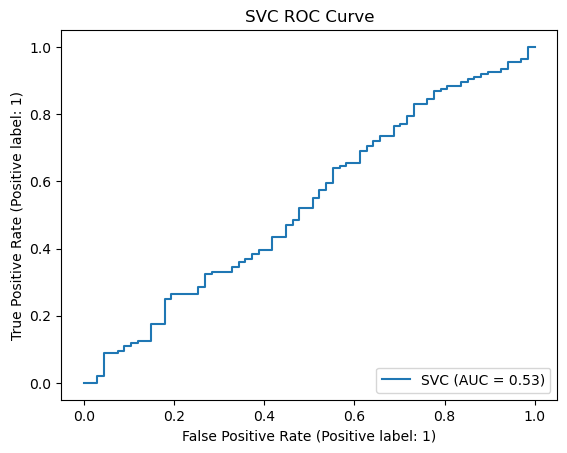

In [34]:
svc_disp = RocCurveDisplay.from_estimator(model_svc, scaled_X_test, y_test)
plt.title("SVC ROC Curve")
plt.show()